## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [1]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq, log
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

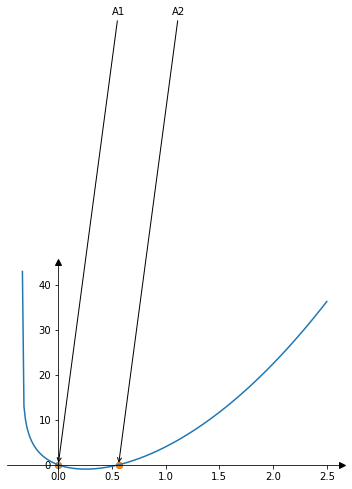

In [68]:
def f(x, lib = 'sympy'):
    if lib == 'sympy':
        return (x**2+3*x-2)*sympy.log(3*x+1, 2)
    elif lib == "np":
        return (x**2+3*x-2)*np.log2(3*x+1)

def getRoots():
    roots = []
    for i in solve(f(x)):
        if i > -1/3:
            roots.append(i)
    y_coord = [0]*len(roots)
    return roots, y_coord

x = Symbol("x")
roots, y_coord = getRoots()
X = np.linspace(-1/3.0001, 2.5, 200)
plt.scatter(roots, y_coord)

ax = plt.gca() 
for i, x_coord in enumerate(roots): 
    ax.annotate('A' + str(i + 1), 
                xy=(x_coord, y_coord[i]), 
                xycoords='data', 
                xytext=(x_coord + 0.5, y_coord[i] + 100), 
                textcoords='data', 
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3")) 
ax.spines['right'].set_color('none') # Правая сторона рамки стала бесцветной, но не исчезла!
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0)) # Нижняя сторона рамки переместилась в начало координат
ax.spines['left'].set_position(('data', 0))    
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(X, f(X, lib = "np"))
ax.scatter(roots, y_coord)

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

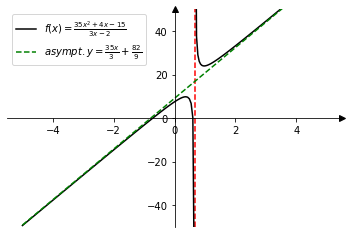

In [75]:
def f(x):
    return (35*x**2 + 4*x - 15)/(3*x - 2)

x = Symbol("x")
fnum, fdenom = sympy.fraction(f(x)) 
v_as = sympy.solveset(fdenom, x) 

y0pos = sympy.limit(f(x), x, +sympy.oo)
y0neg = sympy.limit(f(x), x, -sympy.oo)
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
k = (kneg, kpos)
if kpos == kneg:
    k = kpos

b = sympy.limit(f(x) - k*x, x, sympy.oo)
y_as = k*x +b

minY = -50  
maxY = 50
ax = plt.gca()
ax.set(ylim=(minY, maxY))
for item in v_as:
    ax.axvline(x=item, color='red', linestyle='--')    
X1 = np.linspace(-5, float(item - 0.01), 100) 
X2 = np.linspace(float(item + 0.01), 5, 100)
Y1 = f(X1)
Y2 = f(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-') # График правой ветви функции
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')# График наклонной асимптоты
ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

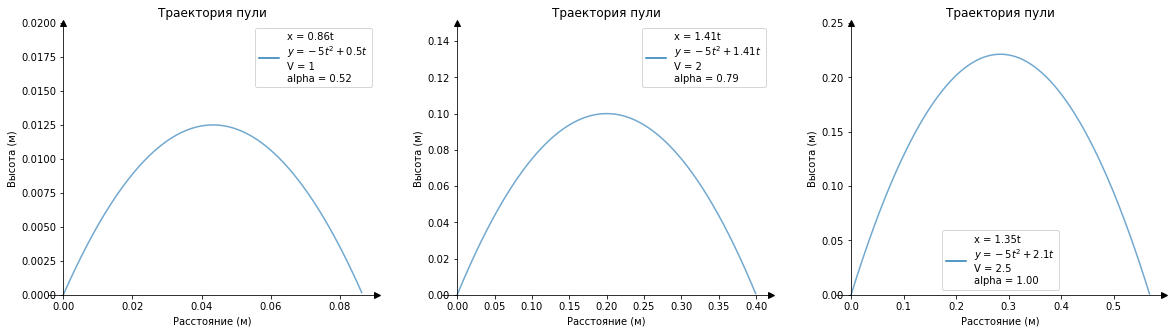

In [90]:
def f(v, a, t):
    x = v * t * np.cos(a)
    y = v * t * np.sin(a) - 10 * t * t / 2
    return x, y

x, t = symbols("x t")
values = [[1, np.pi / 6, (0, 0.02), [0.86, -5, 0.5]], [2, np.pi / 4, (0, 0.15), [1.41, -5, 1.41]], [2.5, 1, (0, 0.25), [1.35, -5, 2.1]]]
plt.figure(figsize = (20, 5))
for i in range(len(values)):
    item = values[i]
    v, a = item[0], item[1]
    t_values = sympy.solveset(v * t * np.sin(a) - 10 * t * t / 2, t)
    minT, maxT =  t_values.args[0], t_values.args[1]
    
    graphic = plt.subplot(1, 3, i + 1)
    graphic.set(ylim=item[2])
    coeffs = item[3]
    graphic.plot(0, 0, label = f"x = {coeffs[0]}t" + "\n" + f"$y = {coeffs[1]}{sympy.latex(t**2)} + {coeffs[2]}t$" + "\n" + f"V = {v}" + "\n" + f"alpha = {a:.2f}")
    x_values, y_values = [], []
    zoom = 3000
    for step in range(int(minT * zoom), int(maxT * zoom)):
        x, y = f(v, a, step / zoom)
        x_values.append(x)
        y_values.append(y)
    graphic.plot(x_values, y_values, color = "#71a8cf")
    graphic.set_title(f"Траектория пули")
    graphic.set_xlabel('Расстояние (м)')
    graphic.set_ylabel('Высота (м)')
    
    graphic.legend(loc='best')
    graphic.spines['right'].set_color('none')
    graphic.spines['top'].set_color('none')
    graphic.spines['bottom'].set_position(('data', 0))
    graphic.spines['left'].set_position(('data', 0))
    graphic.plot(1, 0, ">k", transform=graphic.get_yaxis_transform(), clip_on=False)
    graphic.plot(0, 1, "^k", transform=graphic.get_xaxis_transform(), clip_on=False)

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

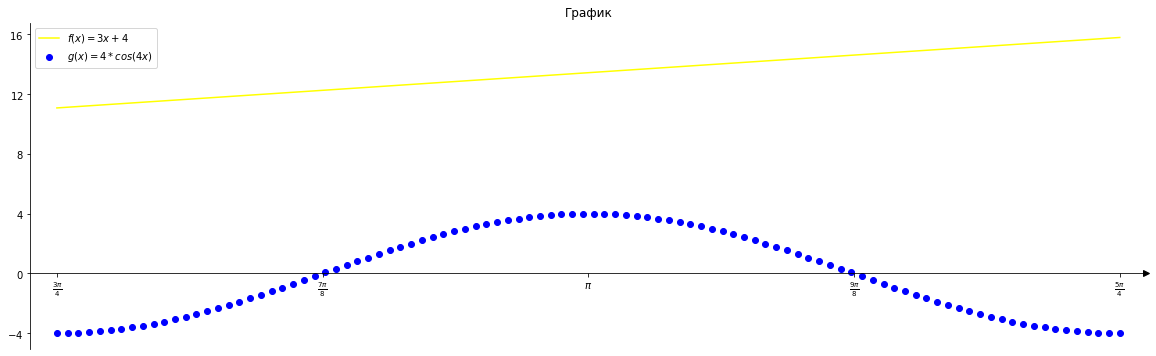

In [154]:
def f(x):
    return 3 * x + 4

def g(x):
    return 4 * np.cos(4 * x)

x  = symbols("x")
plt.figure(figsize = (20, 6))
graphic = plt.gca()
graphic.set(xlim = (2.95 * np.pi / 4, 5.05 * np.pi / 4))
x_values = np.linspace(3 * np.pi / 4, 5 * np.pi / 4, 100)

graphic.plot(x_values, f(x_values), color = "yellow", label = f"$ f(x) = {latex(f(x))} $")
graphic.scatter(x_values, g(x_values), color = "blue", label = f"$ g(x) = 4*cos(4x) $")

graphic.set_xticks([3 * np.pi / 4 + i * np.pi / 8 for i in range(5)])
graphic.set_xticklabels([r'$' + latex(3 * sympy.pi / 4 + i * sympy.pi / 8) + r'$' for i in range(5)]) 

graphic.set_yticks([-4 + i * 4 for i in range(10)])
graphic.set_yticklabels([r'$' + latex(-4 + i * 4) + r'$' for i in range(10)]) 

graphic.set_title(f"График")
graphic.legend(loc='upper left')
graphic.spines['right'].set_color('none')
graphic.spines['top'].set_color('none')
graphic.spines['bottom'].set_position(('data', 0))
graphic.plot(1, 0, ">k", transform=graphic.get_yaxis_transform(), clip_on=False)